# Systematic Trading Skeleton Code

The code below install all required packages and then reads inthe list of tickers from wikipedia to then pull the data for the current S&P 500 from yahoo finance.

The DataFrame produced also needs to be cleaned due to the large number of NaN values stored inside and it is up to you to decide exactly how to do this. 

A lot of these NaN values arise because the stock price data for a specific company is not stored on Yahoo finance before a certain date. This could be for multiple reasons. 

The code has been set to remove all dates with NaN values although this only gives approx 6 mounths of data for backtesting. If you want to use more dates for backtesting then this will need to be changed.



In [1]:
import numpy as np
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
tickers = list(pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].dropna())

for i in range(len(tickers)):
  tickers[i] = tickers[i].replace(".","-")
# feel free to change this time value although if you choose a date that was more than 10 years ago it will take yf a while to download all the data
data = yf.download(tickers,"2015-01-01")

[*********************100%%**********************]  503 of 503 completed


In [32]:
data.index = pd.to_datetime(data.index)

In [33]:
# running these commands can help to understand the shape of the dataframe object data
data.tail()


Adj Close                                                        \
                     A    AAL        AAP        AAPL        ABBV         ABC   
Date                                                                           
2023-08-21  118.860001  15.16  68.199997  175.839996  150.160004  180.979996   
2023-08-22  117.639999  14.83  67.339996  177.229996  148.240005  177.960007   
2023-08-23  119.129997  14.78  69.440002  181.119995  147.080002  177.770004   
2023-08-24  119.489998  14.57  67.910004  176.380005  146.630005  178.770004   
2023-08-25  119.680000  14.58  64.080002  178.610001  146.690002  179.479996   

                                                           ...   Volume  \
                   ABT       ACGL         ACN        ADBE  ...     WYNN   
Date                                                       ...            
2023-08-21  103.870003  74.949997  306.510010  520.469971  ...  2026000   
2023-08-22  105.150002  74.570000  308.899994  519.479980  ...  2297500   
2023-08-23  105.129997  75.400002  315.339996  530.710022  ...  1298600   
2023-08-24  103.750000  75.410004  314.140015  512.429993  ...  1494000   
2023-08-25  104.209999  74.620003  318.760010  525.059998  ...  1706200   

                                                                           \
                XEL       XOM     XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                        
2023-08-21  3132200  11092400  1121300   773700  1537100  1248100  373900   
2023-08-22  3142600  10520800  1065100   833700  1207700  3648900  340500   
2023-08-23  8610700  11435600   643000  1012500  1441600  2755200  314800   
2023-08-24  5780900  10818500   807700   896800  1131100  1953000  246300   
2023-08-25  7705300  13578900   809300   973800  1097300  1456400  337300   

                              
               ZION      ZTS  
Date                          
2023-08-21  2127700   860200  
2023-08-22  3133000  1286400  
2023-08-23  2004600  1022900  
2023-08-24  2555200  1210300  
2023-08-25  1423500   879700  

[5 rows x 3018 columns]

In [35]:
data.dtypes

Adj Close  A       float64
           AAL     float64
           AAP     float64
           AAPL    float64
           ABBV    float64
                    ...   
Volume     YUM       int64
           ZBH       int64
           ZBRA      int64
           ZION      int64
           ZTS       int64
Length: 3018, dtype: object

In [12]:
data.columns[[0, 503, 1006, 1509, 2012, 2515]]

MultiIndex([('Adj Close', 'A'),
            (    'Close', 'A'),
            (     'High', 'A'),
            (      'Low', 'A'),
            (     'Open', 'A'),
            (   'Volume', 'A')],
           )

In [19]:
data.loc[:,[(   'Close', 'A'), (     'Open', 'A')]]

,Close,Open
,A,A
Date,,
2015-01-02,40.560001,41.180000
2015-01-05,39.799999,40.320000
2015-01-06,39.180000,39.810001
2015-01-07,39.700001,39.520000
2015-01-08,40.889999,40.240002
...,...,...
2023-08-21,118.860001,119.500000
2023-08-22,117.639999,117.849998


In [4]:
def data_dropna():
  #  note the dataframe below has lots of NaN values because not all stocks were listed from 2016
  return data.dropna()

def data_enter_team_name():
  ## ENTER YOUR DATA CLEANING CODE HERE. 
  ## this should output all data you need for your strategy
  return data.dropna()

In [5]:
def buyandhold(start_date, end_date):
  strat = pd.DataFrame(data = np.ones([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
  
  return strat

def strat_insert_team_name(start_date, end_date): # enter youre team name!!!
  # insert your strategy here!!!!!
  # note this function shoudl return a dataframe of weights with columns representing each stock
  # and index representing the same datetime index as the data used
  strat = pd.DataFrame(data = np.zeros([len(df),len(df.columns)]), 
                       index = df.index)
  return strat

In [6]:
def strategy(start_date, end_date, 
                  strat_func=buyandhold, data_func=data_dropna, 
                  fig_strat=True, risk_free_rate = 0.001):
  global df 
  df = data_func()["Adj Close"][start_date: end_date]
  return_df = np.array(df.pct_change())
  strat_df = pd.DataFrame(index = df.index)
  strat_df["daily returns"] = (return_df * strat_func(start_date, end_date).shift(1)).sum(axis=1)
  strat_df["cumulative % returns"] = ((strat_df["daily returns"]+1).cumprod() - 1) * 100
  
  sharpe  = 0.01*((strat_df["cumulative % returns"][-1]/100 - 
                    len(strat_df) * risk_free_rate) /
                    strat_df["daily returns"].std())
  if fig_strat:
    plt.figure()
    plt.title("Strategy Backtest from "+ start_date+" to "+end_date)
    plt.plot(strat_df["cumulative % returns"])
    plt.plot(strat_df["cumulative % returns"].rolling(25).mean())
    plt.show()
  
  return strat_df, sharpe
 

In [90]:
def momentum_strat(start_date, end_date):
    global df
    df = data.loc[start_date: end_date, ('Adj Close', 'A'):('Adj Close', 'ZTS')]
    momentum = df.pct_change(len(data.loc[start_date:end_date]) - 1)

    strat = momentum / (503*abs(momentum))
    return strat.iloc[-1, :]
    

In [89]:
momentum_strat("2023-01-01", "2023-03-20")

Adj Close  A      -0.001988
           AAL     0.001988
           AAP    -0.001988
           AAPL    0.001988
           ABBV   -0.001988
                     ...   
           YUM     0.001988
           ZBH    -0.001988
           ZBRA    0.001988
           ZION   -0.001988
           ZTS     0.001988
Name: 2023-03-20 00:00:00, Length: 503, dtype: float64

In [ ]:
def relative_momentum_strat(start_date, end_date, p, q, t):
    strat = pd.DataFrame(data = np.zeros([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
    return_strat = df.pct_change(p)
          
    
    return strat


In [ ]:
def strategy_2(start_date, end_date)

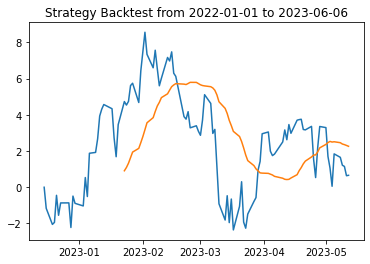

(            daily returns  cumulative % returns
 Date                                           
 2022-12-15       0.000000              0.000000
 2022-12-16      -0.011645             -1.164468
 2022-12-19      -0.008989             -2.052909
 2022-12-20       0.001137             -1.941547
 2022-12-21       0.015255             -0.445645
 ...                   ...                   ...
 2023-05-08      -0.001881              1.652814
 2023-05-09      -0.004285              1.217249
 2023-05-10      -0.000656              1.150819
 2023-05-11      -0.005069              0.638134
 2023-05-12       0.000217              0.659992
 
 [102 rows x 2 columns],
 -0.0925241595385432)

In [7]:
strategy("2022-01-01", "2023-06-06") # example for buy and hold strategy after removing all dates with NaN values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


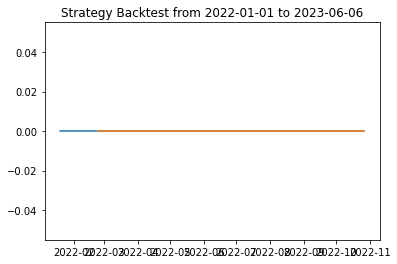

(            daily returns  cumulative % returns
 Date                                           
 2022-01-19            0.0                   0.0
 2022-01-20            0.0                   0.0
 2022-01-21            0.0                   0.0
 2022-01-24            0.0                   0.0
 2022-01-25            0.0                   0.0
 ...                   ...                   ...
 2022-10-21            0.0                   0.0
 2022-10-24            0.0                   0.0
 2022-10-25            0.0                   0.0
 2022-10-26            0.0                   0.0
 2022-10-27            0.0                   0.0
 
 [196 rows x 2 columns], -inf)

In [ ]:
 # use this cell to backtest your own strategy. make sure to change the function names
strategy("2022-01-01", "2023-06-06", strat_func = strat_insert_team_name, data_func = data_enter_team_name)